# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Business Use Case                                         

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


Dataset Attributes

Here is the description of all the variables:
•	Variable: Definition                       

•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign

Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [2]:
train_df = pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/ML project/bank_marketing_termdeposit_train.csv")
test_df = pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/ML project/bank_marketing_termdeposit_test.csv")

# Exploratory Data Analysis

In [3]:
train_df.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [4]:
train_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [5]:
train_df.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
13472,18137,60,retired,married,secondary,no,194,no,yes,cellular,30,jul,61,5,-1,0,unknown,no
1448,22895,49,admin.,married,secondary,no,272,no,yes,telephone,25,aug,146,18,-1,0,unknown,no
3610,1076,49,services,single,primary,no,114,yes,no,unknown,7,may,99,2,-1,0,unknown,no
25529,18623,42,blue-collar,married,secondary,no,108,yes,no,telephone,31,jul,51,21,-1,0,unknown,no
17353,43580,41,unemployed,married,tertiary,no,0,no,no,cellular,29,apr,882,1,181,3,success,yes


In [6]:
test_df.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


# Shape of the data

In [7]:
rows_count, columns_count = train_df.shape
print('Shape of train data:-')
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Shape of train data:-
Total Number of rows : 31647
Total Number of columns : 18


In [8]:
rows_count, columns_count = test_df.shape
print('Shape of Test data:-')
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Shape of Test data:-
Total Number of rows : 13564
Total Number of columns : 17


There are three different types of data(int64 and object) present in the dataset.

In [9]:
#Checking the null Values in train dataset
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
#Checking the null Values in test dataset
test_df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There is no any null values in test and train dataset

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


int type : age, balance, day, duration, campaign, pdays, previous
    
object type : job, marital, education, default, housing, loan, contact, month, poutcome, Target
As we can see the datatypes several of variables are string object. So, we will be changing it to appropriate datatype in data cleaning part.

In [13]:
#Checking number of unique values in each column
train_df.nunique().to_frame("No of unique values")

,No of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [14]:
print(train_df.job.value_counts())
print('\n',train_df.marital.value_counts())
print('\n',train_df.education.value_counts())
print('\n',train_df.default.value_counts())
print('\n',train_df.housing.value_counts())
print('\n',train_df.loan.value_counts())
print('\n',train_df.contact.value_counts())
print('\n',train_df.month.value_counts())
print('\n',train_df.poutcome.value_counts())

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

 married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

 secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

 no     31062
yes      585
Name: default, dtype: int64

 yes    17584
no     14063
Name: housing, dtype: int64

 no     26516
yes     5131
Name: loan, dtype: int64

 cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

 may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

 unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int

In [15]:
train_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [16]:
train_df.describe().T[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,2.0,11218.0,22519.0,33879.5,45211.0
age,18.0,33.0,39.0,48.0,95.0
balance,-8019.0,73.0,450.0,1431.0,102127.0
day,1.0,8.0,16.0,21.0,31.0
duration,0.0,104.0,180.0,318.5,4918.0
campaign,1.0,1.0,2.0,3.0,63.0
pdays,-1.0,-1.0,-1.0,-1.0,871.0
previous,0.0,0.0,0.0,0.0,275.0


# Encoding

In [17]:
# Encoding traning dataset
encode = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "subscribed":    {"no": 0, "yes": 1} 
                    }

train_df=train_df.replace(encode)
train_df.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
17826,5674,44,3,2,1,0,-1379,1,1,-1,26,5,140,1,-1,0,-1,0
10876,13719,48,1,1,2,0,-367,1,0,1,10,7,281,1,-1,0,-1,0
23954,12524,37,1,2,2,0,606,1,1,-1,3,7,375,3,-1,0,-1,0
9495,43676,66,2,2,2,0,587,0,0,1,12,5,457,2,392,2,1,1
21967,25555,42,5,3,2,0,266,1,1,1,19,11,97,1,-1,0,-1,0
13470,37904,34,1,2,2,0,2447,1,0,1,14,5,330,2,-1,0,-1,0
29509,16882,49,1,1,1,0,566,1,0,1,25,7,979,2,-1,0,-1,1
26051,5926,31,2,1,3,0,-307,1,1,-1,26,5,91,2,-1,0,-1,0
25412,3528,46,1,2,2,0,756,1,0,-1,15,5,401,7,-1,0,-1,0
21369,20163,30,3,1,2,0,44,0,0,1,11,8,187,2,-1,0,-1,0


In [18]:
# Encoding test dataset
encode = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                    }

test_df=test_df.replace(encode)
test_df.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4617,12666,25,1,1,2,0,192,0,0,2,4,7,112,2,-1,0,-1
10871,7657,54,1,3,2,0,154,1,0,-1,30,5,197,12,-1,0,-1
12786,42484,79,6,2,1,0,3025,0,0,1,11,12,166,3,126,3,2
3105,366,46,3,2,3,0,841,1,0,-1,6,5,158,1,-1,0,-1
9795,41117,50,3,2,2,0,2218,1,0,1,17,8,711,1,-1,0,-1
10609,37323,59,1,2,1,0,-91,1,0,1,13,5,239,1,369,5,0
10533,8393,31,9,2,2,0,86,1,1,-1,3,6,963,2,-1,0,-1
10286,18311,35,1,3,1,0,1792,1,0,1,31,7,630,6,-1,0,-1
8073,39289,22,5,2,2,0,817,1,0,1,18,5,128,3,-1,0,-1
3346,14084,37,3,2,2,0,407,1,0,1,11,7,141,2,-1,0,-1


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          31647 non-null  int64
 1   age         31647 non-null  int64
 2   job         31647 non-null  int64
 3   marital     31647 non-null  int64
 4   education   31647 non-null  int64
 5   default     31647 non-null  int64
 6   balance     31647 non-null  int64
 7   housing     31647 non-null  int64
 8   loan        31647 non-null  int64
 9   contact     31647 non-null  int64
 10  day         31647 non-null  int64
 11  month       31647 non-null  int64
 12  duration    31647 non-null  int64
 13  campaign    31647 non-null  int64
 14  pdays       31647 non-null  int64
 15  previous    31647 non-null  int64
 16  poutcome    31647 non-null  int64
 17  subscribed  31647 non-null  int64
dtypes: int64(18)
memory usage: 4.3 MB


Converted all object in int type

# drop unwanted collumns

In [20]:
#drop unwanted collumns train data frame
train_df = train_df.drop('ID', axis=1)
train_df = train_df.drop('contact', axis=1)


In [21]:
#drop for test dataset
test_df = test_df.drop('ID', axis=1)
test_df = test_df.drop('contact', axis=1)

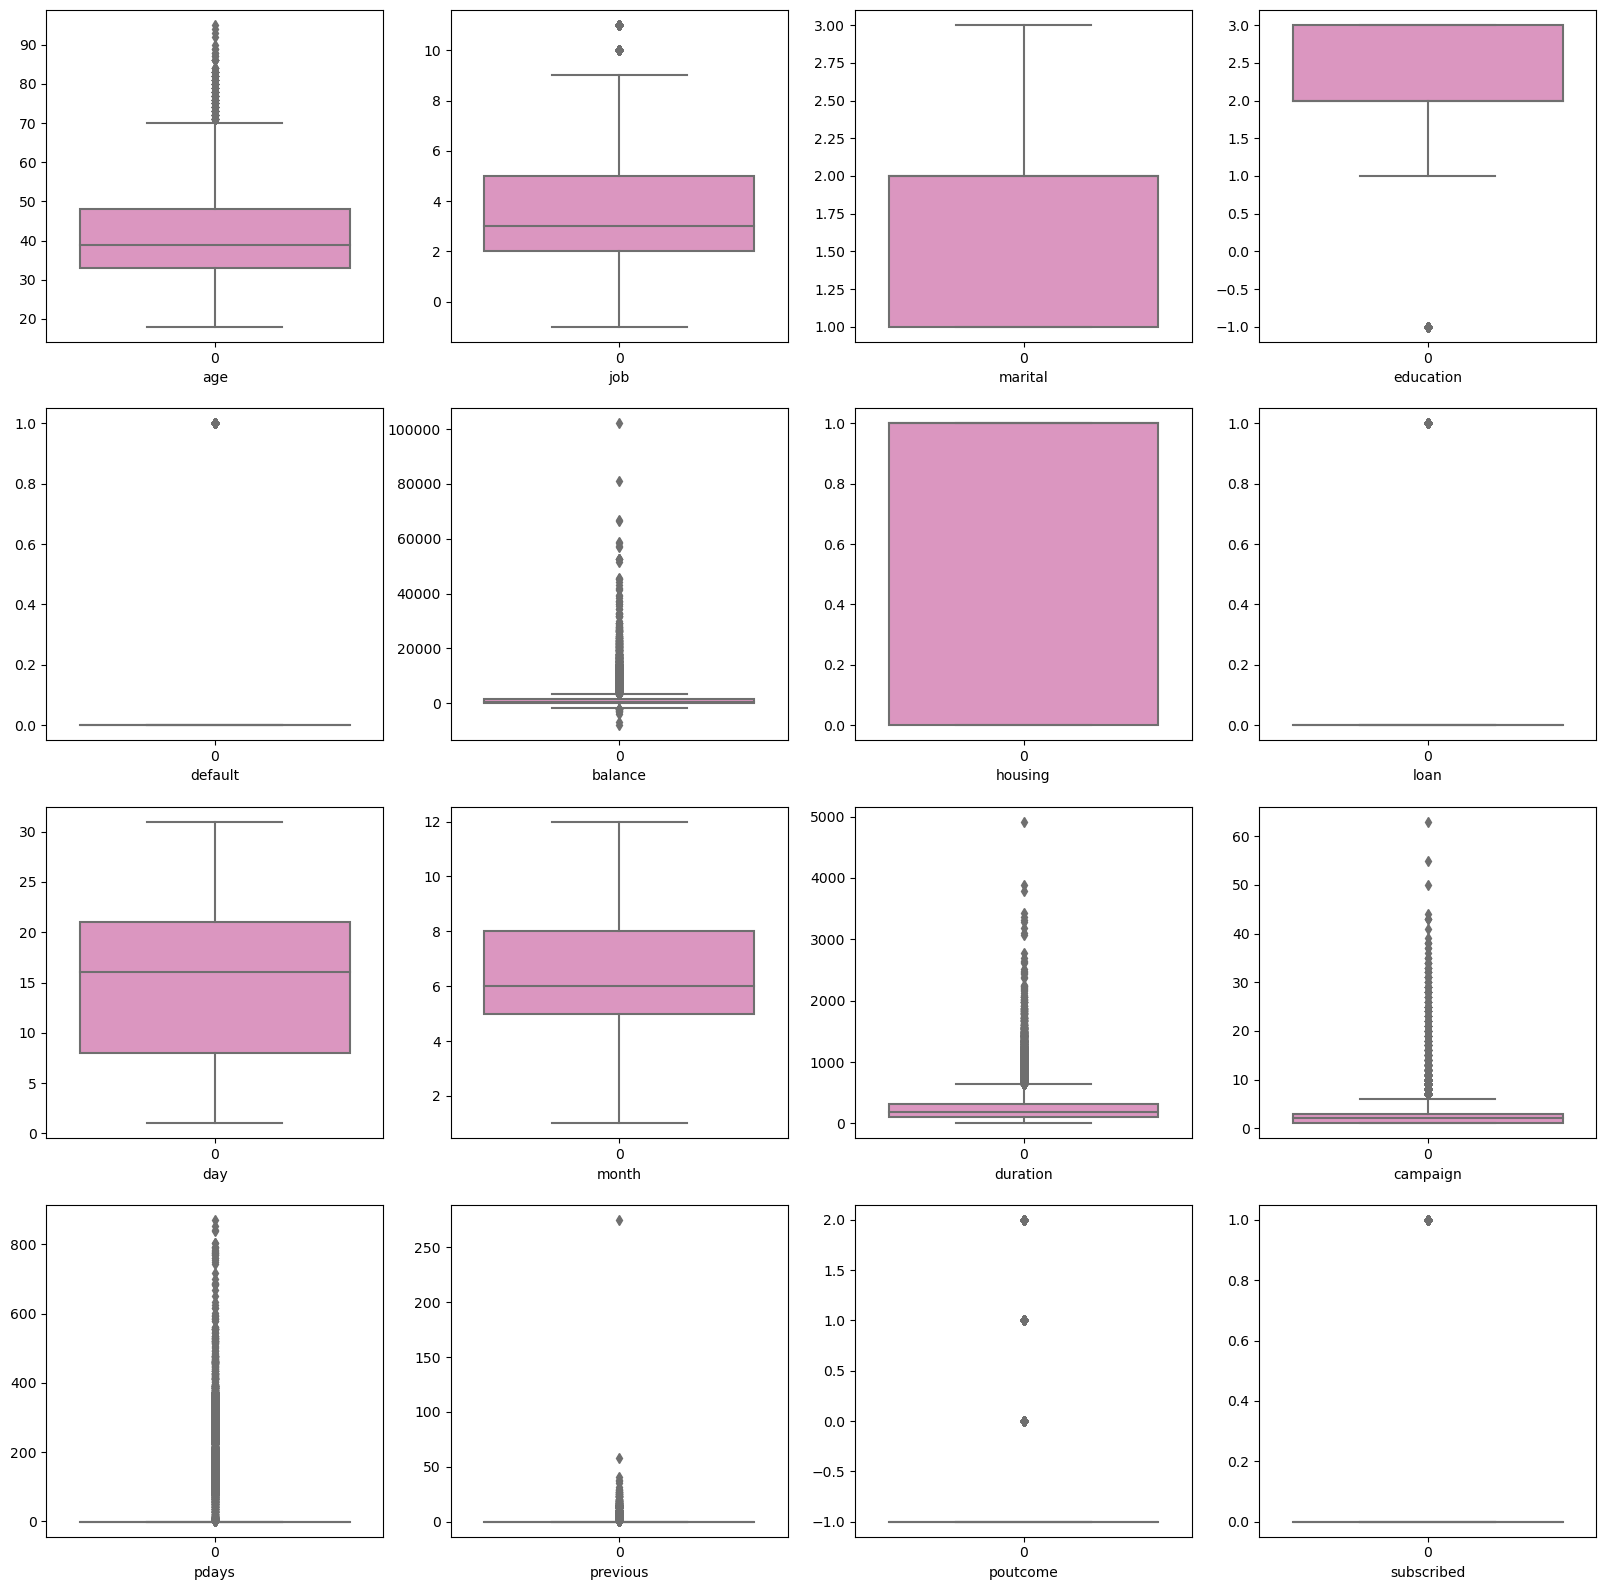

In [22]:
# Lets check any outliers are present or not by boxplot.
plt.figure(figsize=(20,25))
p=1
for i in train_df:
    if p<=18:
        plt.subplot(5,4,p)
        sns.boxplot(train_df[i],palette= "Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

In [23]:
train_df.shape

(31647, 16)

'age', 'balance', 'duration', 'campaign', have some outliers so we remove them


In [24]:
# Define a function to treat outliers using the IQR method
columns = ['age', 'balance', 'duration', 'campaign',]

def treat_outliers_iqr(train_df, column):
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df[column] = train_df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

for column in columns:
    treat_outliers_iqr(train_df, column)



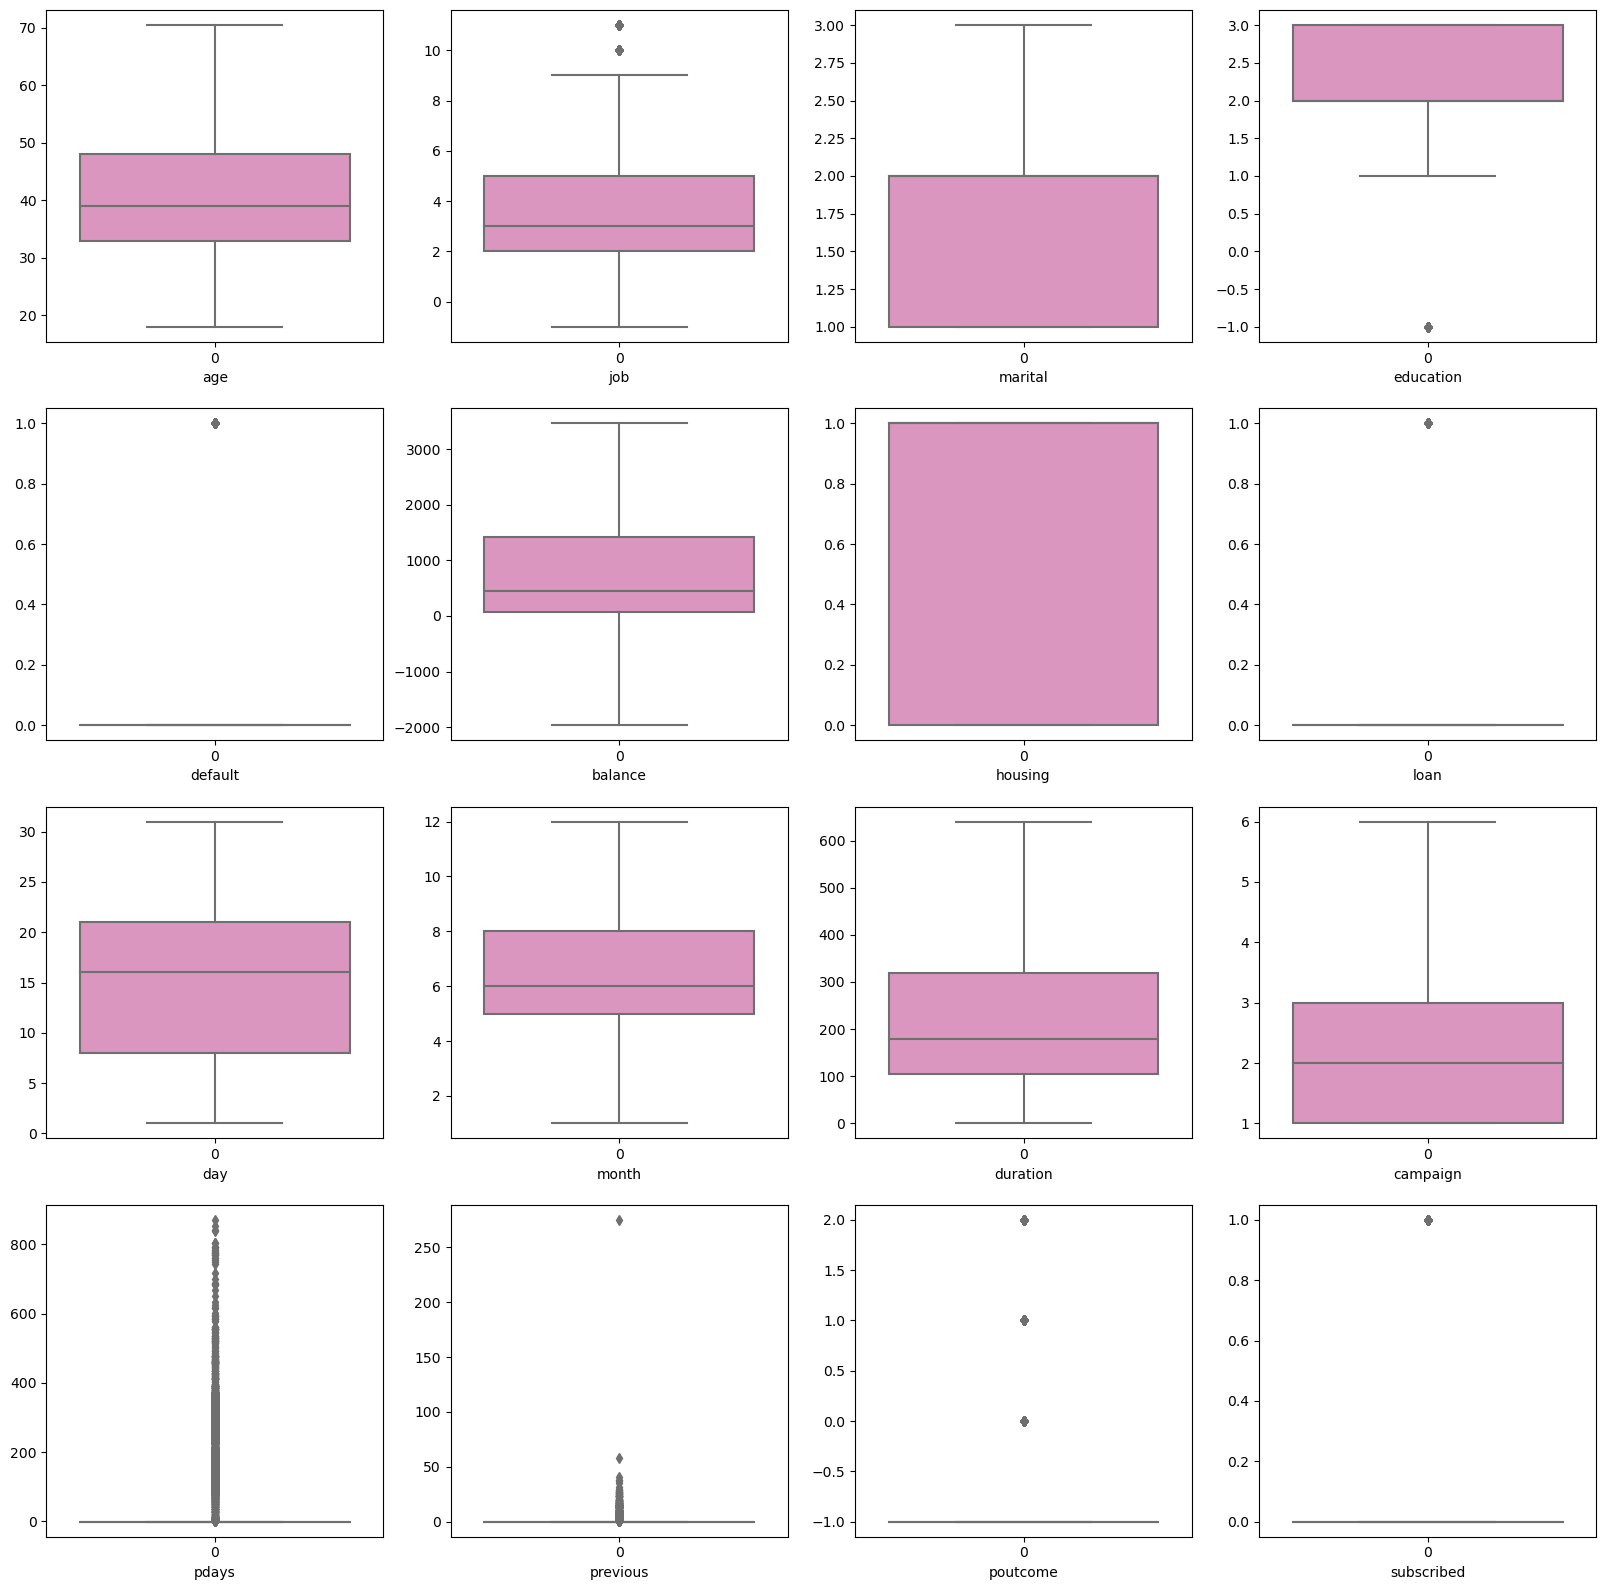

In [25]:
# Lets check any outliers are present or not by boxplot.
plt.figure(figsize=(20,25))
p=1
for i in train_df:
    if p<=18:
        plt.subplot(5,4,p)
        sns.boxplot(train_df[i],palette= "Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

We reomve all outliers from data frame

In [26]:
train_df['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

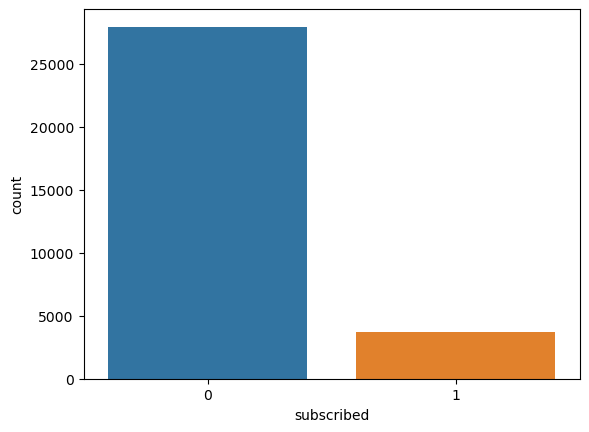

In [27]:
sns.countplot(data=train_df, x='subscribed')
plt.show()

There are 27932 people who is not subscribed and only 3715 who is subscrite so forther we we create dummy veriables for yes 

In [28]:
train_df['job'].value_counts()

 1     6842
 2     6639
 3     5307
 4     3631
 5     2903
 6     1574
 7     1123
 8     1008
 9      905
 10     874
 11     635
-1      206
Name: job, dtype: int64

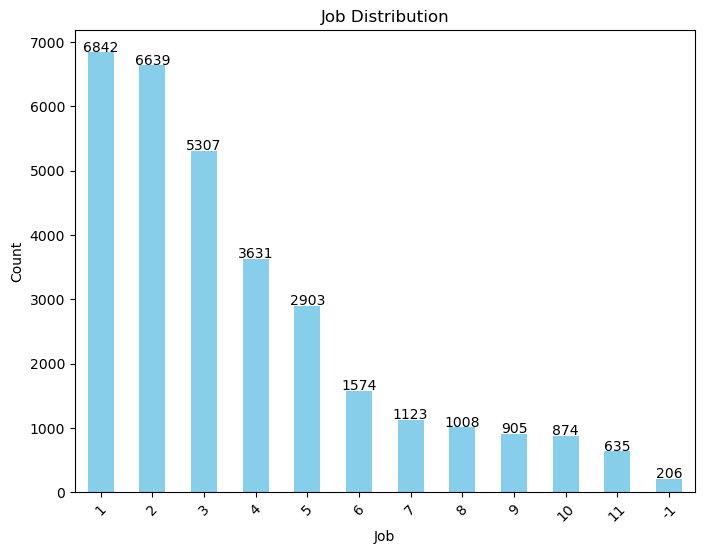

In [29]:
job_counts = train_df['job'].value_counts()

plt.figure(figsize=(8, 6))
ax = job_counts.plot(kind='bar', color='skyblue')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(job_counts):
    ax.text(i, count + 10, str(count), ha='center')

plt.show()

Blue collar and management have more number of jobs 

In [30]:
train_df['marital'].value_counts()

2    19095
1     8922
3     3630
Name: marital, dtype: int64

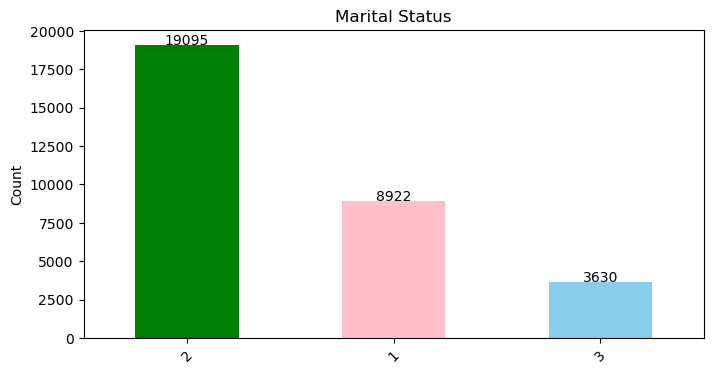

In [31]:
marital_counts = train_df['marital'].value_counts()

colors = ['green', 'pink', 'skyblue']

plt.figure(figsize=(8,4))
ax = marital_counts.plot(kind='bar', color=colors)
plt.title('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(marital_counts):
    ax.text(i, count + 10, str(count), ha='center')

plt.show()


19095 peroples are married, 8922 peoples are single and 3690 peoples are divorced

In [32]:
train_df['education'].value_counts()


 2    16224
 3     9301
 1     4808
-1     1314
Name: education, dtype: int64

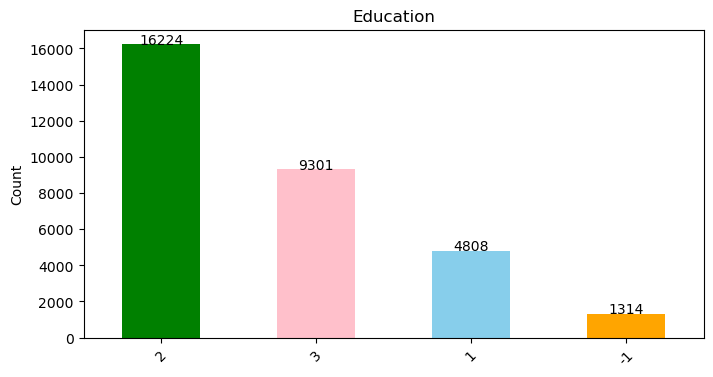

In [33]:
education = train_df['education'].value_counts()

colors = ['green', 'pink', 'skyblue', 'orange']

plt.figure(figsize=(8,4))
ax = education.plot(kind='bar', color=colors)
plt.title('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(education):
    ax.text(i, count + 10, str(count), ha='center')

plt.show()


Secondary have 16224, people tertiary have 9301, primary have 4808 and 1314 are unknown

In [34]:
train_df['default'].value_counts()


0    31062
1      585
Name: default, dtype: int64

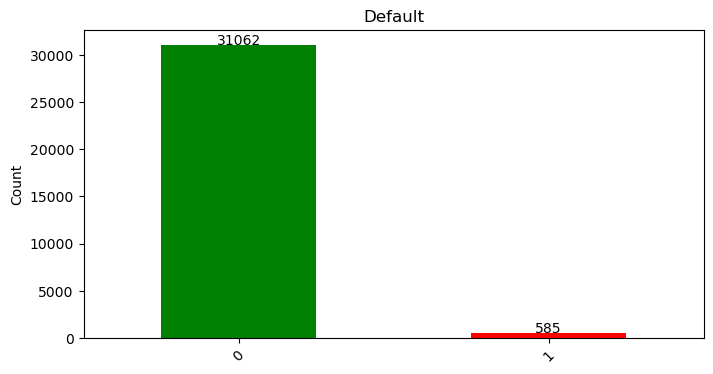

In [35]:
default = train_df['default'].value_counts()

colors = ['green', 'red']

plt.figure(figsize=(8,4))
ax = default.plot(kind='bar', color=colors)
plt.title('Default')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(default):
    ax.text(i, count + 10, str(count), ha='center')

plt.show()

Only 585 peoples are default and rest 31062 are not

In [36]:
train_df['housing'].value_counts()


1    17584
0    14063
Name: housing, dtype: int64

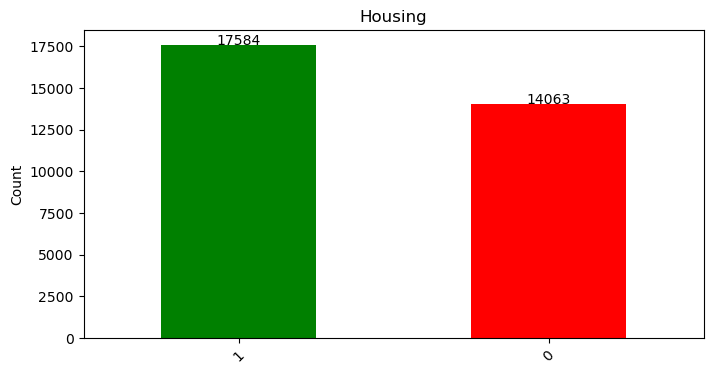

In [37]:
housing = train_df['housing'].value_counts()

colors = ['green', 'red']

plt.figure(figsize=(8,4))
ax = housing.plot(kind='bar', color=colors)
plt.title('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(housing):
    ax.text(i, count + 10, str(count), ha='center')

plt.show()

17584 people have house and 14063 have not

In [38]:
train_df['loan'].value_counts()


0    26516
1     5131
Name: loan, dtype: int64

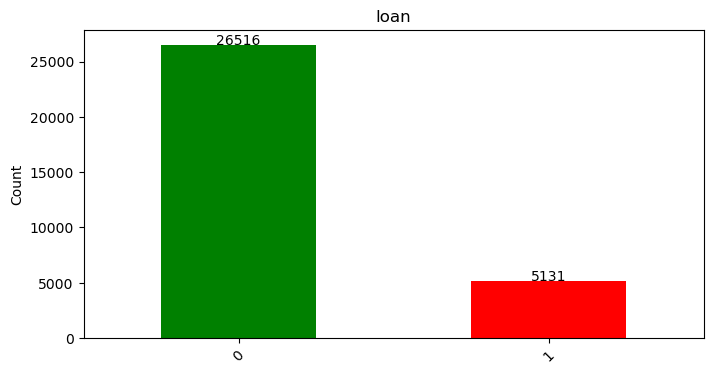

In [39]:
loan = train_df['loan'].value_counts()

colors = ['green', 'red']

plt.figure(figsize=(8,4))
ax = loan.plot(kind='bar', color=colors)
plt.title('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(loan):
    ax.text(i, count + 10, str(count), ha='center')

plt.show()

Only 5131 people did date loan and rest 26516 did not take any loan

In [40]:
train_df['campaign'].value_counts()


1.0    12262
2.0     8798
3.0     3858
6.0     3042
4.0     2442
5.0     1245
Name: campaign, dtype: int64

In [41]:
train_df['duration'].value_counts()


640.25    2288
90.00      135
124.00     130
104.00     127
139.00     127
          ... 
620.00       4
555.00       3
2.00         3
3.00         3
0.00         1
Name: duration, Length: 641, dtype: int64

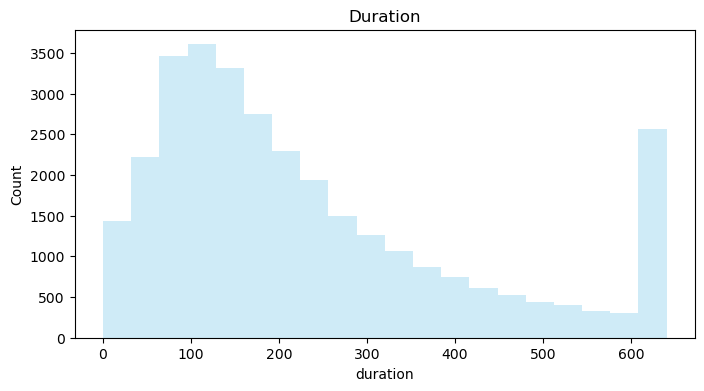

In [42]:
plt.figure(figsize=(8, 4))
sns.distplot(train_df['duration'], kde=False, bins=20, color='skyblue')
plt.title('Duration')
plt.ylabel('Count')
plt.show()


In [43]:
train_df['pdays'].value_counts()


-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64

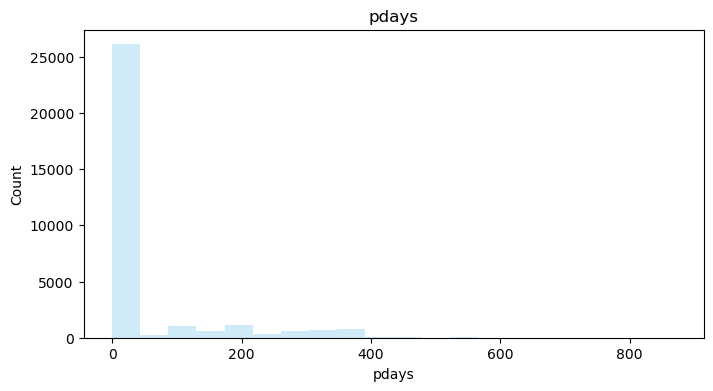

In [44]:
plt.figure(figsize=(8, 4))
sns.distplot(train_df['pdays'], kde=False, bins=20, color='skyblue')
plt.title('pdays')
plt.ylabel('Count')
plt.show()


In [45]:
train_df['poutcome'].value_counts()


-1    25929
 0     3362
 2     1288
 1     1068
Name: poutcome, dtype: int64

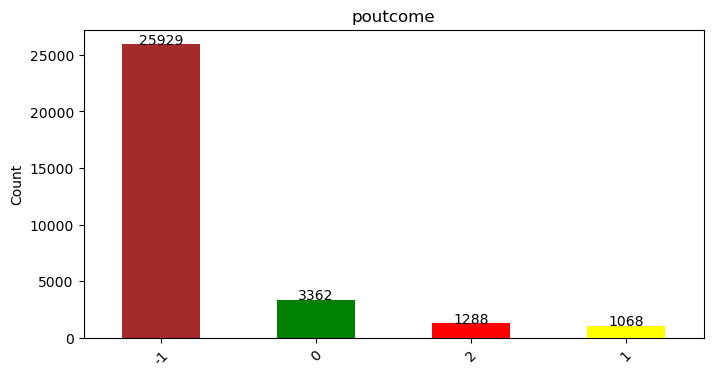

In [46]:
poutcome = train_df['poutcome'].value_counts()

colors = ['Brown', 'green',  'red', 'yellow']

plt.figure(figsize=(8,4))
ax = poutcome.plot(kind='bar', color=colors)
plt.title('poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(poutcome):
    ax.text(i, count + 10, str(count), ha='center')

plt.show()

In [47]:
train_df['previous'].value_counts()


0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
16         8
19         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
26         2
29         2
24         2
275        1
28         1
32         1
30         1
38         1
58         1
35         1
41         1
37         1
Name: previous, dtype: int64

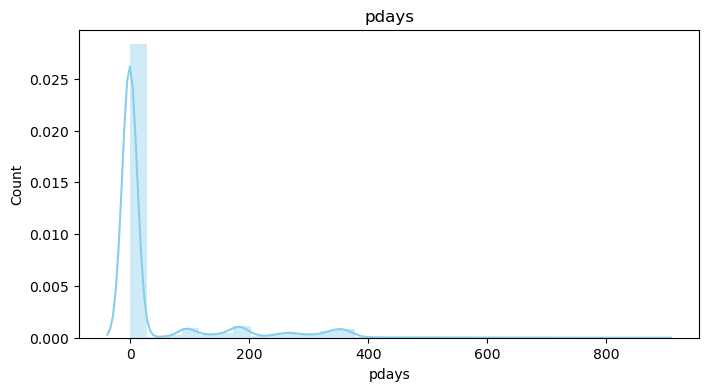

In [48]:
plt.figure(figsize=(8, 4))
sns.distplot(train_df['pdays'], bins=30, color='skyblue')
plt.title('pdays')
plt.ylabel('Count')
plt.show()


# Analysis of 'Subscribed' variable

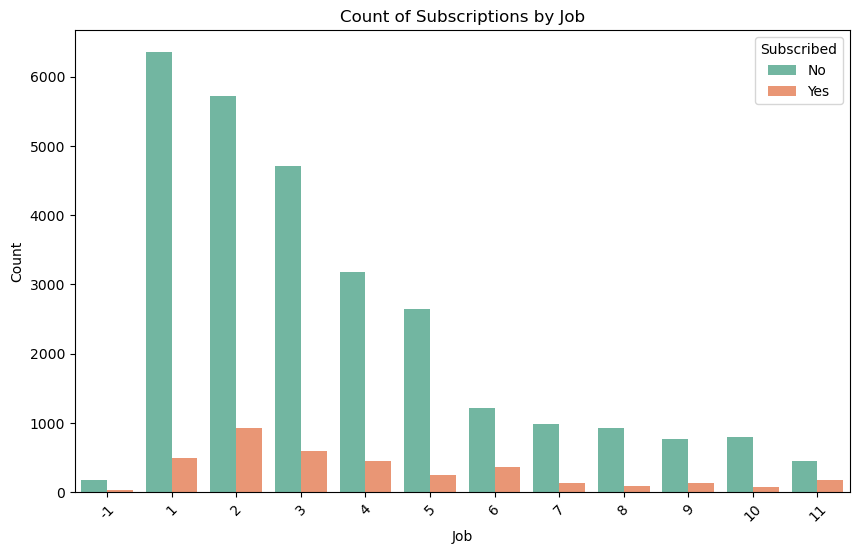

In [49]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_df, x='job', hue='subscribed', palette='Set2')
plt.title('Count of Subscriptions by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.show()

More people subscribed in  blue collar jobs

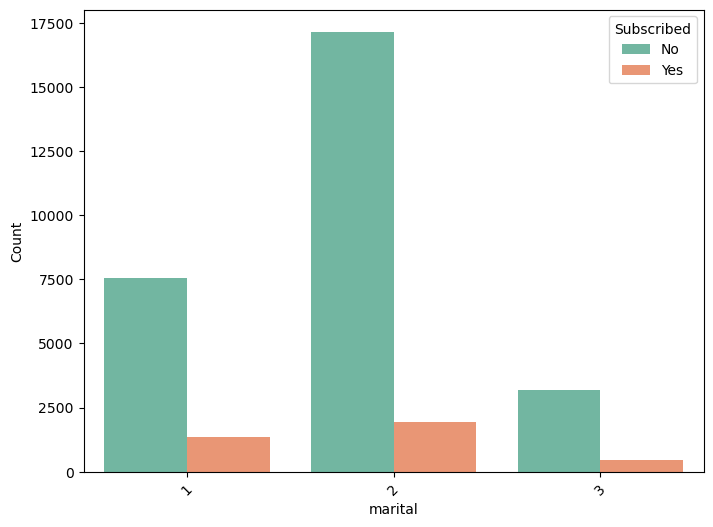

In [50]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=train_df, x='marital', hue='subscribed', palette='Set2')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.show()

People who is married is more who is subscribed

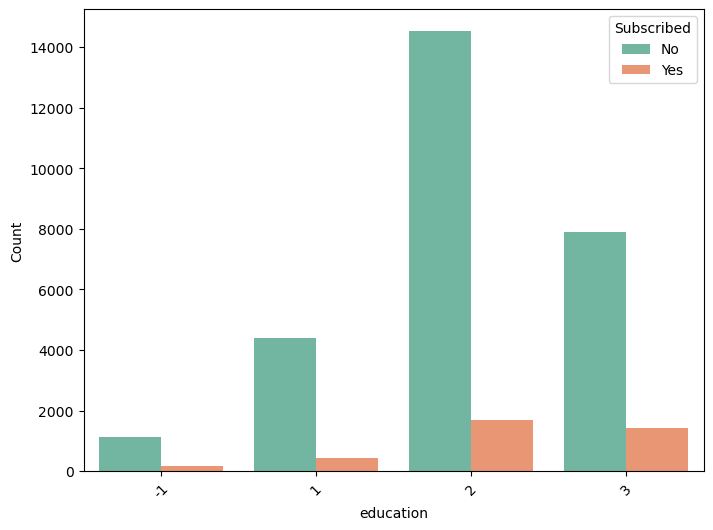

In [51]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=train_df, x='education', hue='subscribed', palette='Set2')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.show()

people wo get secondary education is more subscribed

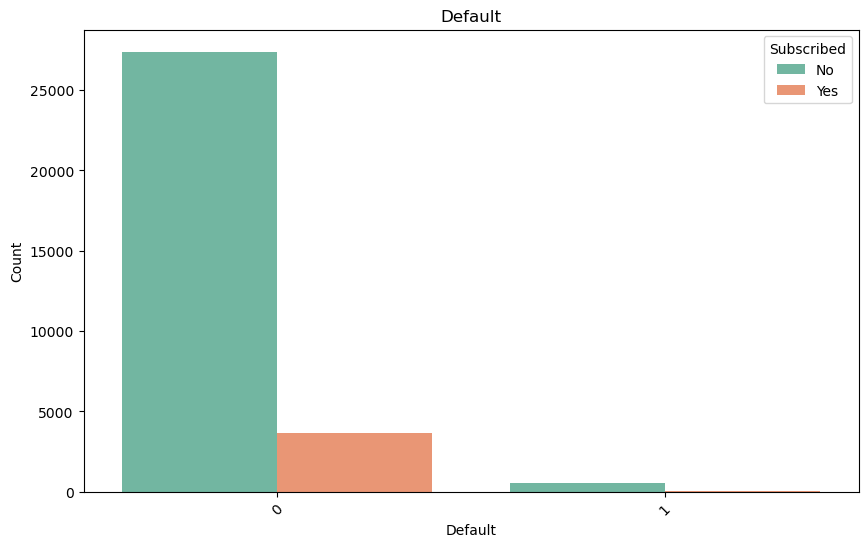

In [52]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_df, x='default', hue='subscribed', palette='Set2')
plt.title('Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.show()

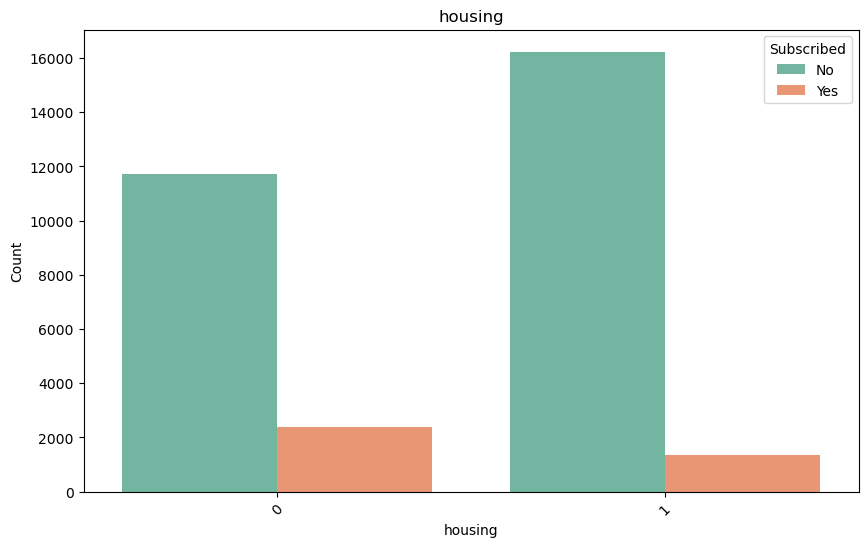

In [53]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_df, x='housing', hue='subscribed', palette='Set2')
plt.title('housing')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [54]:
train_df.corr()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,0.058548,0.410032,-0.161189,-0.015577,0.122869,-0.180563,-0.010061,-0.010427,0.098720,-0.015374,0.026044,-0.023699,0.004126,-0.004933,0.019152
job,0.058548,1.000000,-0.024099,-0.023153,0.003480,0.023486,-0.147123,-0.026896,-0.006862,0.009153,0.005036,-0.029757,-0.009690,0.000978,0.018345,0.058789
marital,0.410032,-0.024099,1.000000,-0.081467,0.009591,-0.009628,0.017846,0.041654,0.007686,0.052429,-0.015499,0.024171,-0.019741,-0.012717,-0.030130,-0.046043
education,-0.161189,-0.023153,-0.081467,1.000000,-0.005232,0.032746,-0.027271,0.015029,0.012972,0.063116,0.004263,0.002913,0.009513,0.020473,0.031905,0.042877
default,-0.015577,0.003480,0.009591,-0.005232,1.000000,-0.126760,-0.011823,0.081567,0.009996,0.014244,-0.006787,0.016005,-0.029622,-0.015877,-0.033526,-0.020168
balance,0.122869,0.023486,-0.009628,0.032746,-0.126760,1.000000,-0.079410,-0.117853,0.007430,0.108956,0.040427,-0.028337,0.018084,0.032210,0.057225,0.092853
housing,-0.180563,-0.147123,0.017846,-0.027271,-0.011823,-0.079410,1.000000,0.036244,-0.025666,-0.173980,0.003575,-0.036880,0.118790,0.034231,0.025591,-0.141092
loan,-0.010061,-0.026896,0.041654,0.015029,0.081567,-0.117853,0.036244,1.000000,0.014769,0.022717,-0.015141,0.005057,-0.020078,-0.009258,-0.033632,-0.072266
day,-0.010427,-0.006862,0.007686,0.012972,0.009996,0.007430,-0.025666,0.014769,1.000000,0.099356,-0.042061,0.151322,-0.087626,-0.048752,-0.064936,-0.029600
month,0.098720,0.009153,0.052429,0.063116,0.014244,0.108956,-0.173980,0.022717,0.099356,1.000000,-0.017448,0.057026,-0.103269,-0.028664,-0.049019,0.023153


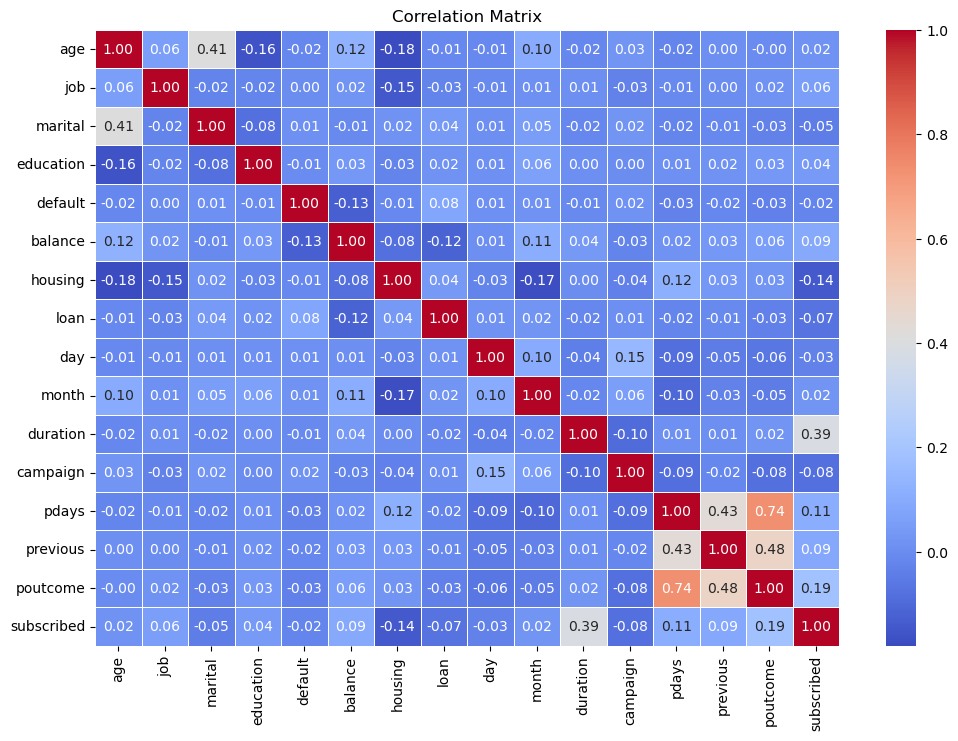

In [55]:
corr_matrix = train_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Seprating features and label

In [56]:
x=train_df.iloc[:,0:-1]
y=train_df.iloc[:,-1]


In [57]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=.3,random_state=42)

# Checking accuracy for DecisionTreeClassifier

In [58]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.8955239599789363


In [59]:
dtc=DecisionTreeClassifier(criterion= 'gini',max_depth=10 ,min_samples_split=2, min_samples_leaf=1 )
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_val)

print("Accuracy:", accuracy_score(y_val, pred_dtc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_val, pred_dtc))
print("")
print("Classification Report:\n", classification_report(y_val, pred_dtc))


Accuracy: 0.8918378093733544

Confusion Matrix:
 [[7975  410]
 [ 617  493]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      8385
           1       0.55      0.44      0.49      1110

    accuracy                           0.89      9495
   macro avg       0.74      0.70      0.71      9495
weighted avg       0.88      0.89      0.89      9495



# Checking accuracy for RandomForestClassifier

In [60]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'}
Test Accuracy: 0.9025803054239073


In [61]:
RFC = RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth= 15)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_val)

print("Accuracy:", accuracy_score(y_val, predRFC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_val, predRFC))
print("")
print("Classification Report:\n", classification_report(y_val, predRFC))


Accuracy: 0.9001579778830964

Confusion Matrix:
 [[8206  179]
 [ 769  341]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      8385
           1       0.66      0.31      0.42      1110

    accuracy                           0.90      9495
   macro avg       0.79      0.64      0.68      9495
weighted avg       0.88      0.90      0.88      9495



In [62]:
test_df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,32,5,2,2,0,118,1,0,15,5,20,6,-1,0,-1
1,78,6,3,1,0,2787,0,0,1,7,372,1,-1,0,-1
2,31,7,1,3,0,144,1,0,16,5,676,1,-1,0,-1
3,57,5,1,1,0,3777,1,0,13,5,65,2,-1,0,-1
4,45,1,3,2,0,-705,0,1,3,7,111,1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,2,2,3,0,45,0,0,28,8,148,4,-1,0,-1
13560,54,1,2,1,0,2281,1,0,20,6,158,1,-1,0,-1
13561,35,6,2,1,0,285,1,0,29,1,136,1,-1,0,-1
13562,29,4,1,2,0,464,0,0,9,11,208,2,91,3,1


# RandomForestClassifier gives better prediction

# Cross Validation Score

In [63]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(RFC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_val, predRFC) - score.mean())

[0.90047393 0.90331754 0.89856217 0.90330226 0.90219624]
0.9015704284572857
-0.0014124505741893723


# Saving the model

In [64]:
import joblib
# Save the model as a objectfile

joblib.dump(RFC,'BANK_MARKETING')

['BANK_MARKETING']

# Predecting test dataset

In [65]:
predictions = model.predict(test_df)
predictions_df = pd.DataFrame({'Predicted_Label': predictions})
test_df['Predicted_Label'] = predictions

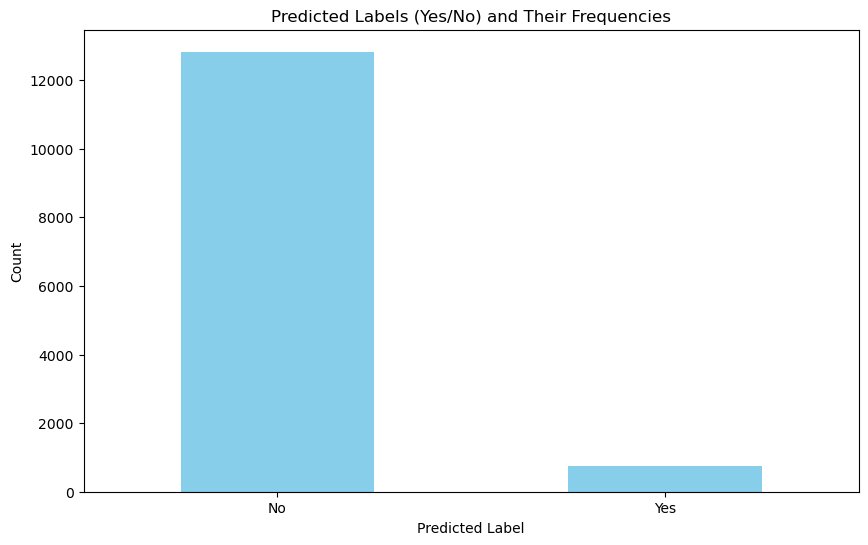

In [68]:
test_pred = predictions_df['Predicted_Label'].value_counts()
test_pred.index = test_pred.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(10, 6))
test_pred.plot(kind='bar', color='skyblue')
plt.xticks(rotation=0)  
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('Predicted Labels (Yes/No) and Their Frequencies')
plt.show()
